In [116]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [117]:
df = pd.read_csv('Wage.csv')
df.shape

(3000, 12)

In [118]:
df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [119]:
df.tail()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
376816,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033
453557,2009,55,1. Male,5. Separated,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.505150,90.481913


#### Check # of unique categores for each categorical feature

In [120]:
feature_col_categorical = ["jobclass","education","race","maritl"]
for col_name in feature_col_categorical:
    cat_unique = len(df[col_name].unique())
    print("Feature '{0}' has {1} unique categories".format(col_name,cat_unique))

Feature 'jobclass' has 2 unique categories
Feature 'education' has 5 unique categories
Feature 'race' has 4 unique categories
Feature 'maritl' has 5 unique categories


#### Dummy variables

In [121]:
def dummy_df(df, dummy_list):
    for dummy in dummy_list:
        dummies = pd.get_dummies(X_df[dummy], prefix=dummy, dummy_na=False)
        df = df.drop(dummy,1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [122]:
feature_col_names = ["year"]
target = ["wage"]
X_df = df[feature_col_names]

# X_df = dummy_df(X_df, feature_col_names)


X = X_df.values
y = df[target].values

In [123]:
X_df.head()

,year
231655,2006
86582,2004
161300,2003
155159,2003
11443,2005


In [124]:
split_test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = split_test_size, random_state=42)

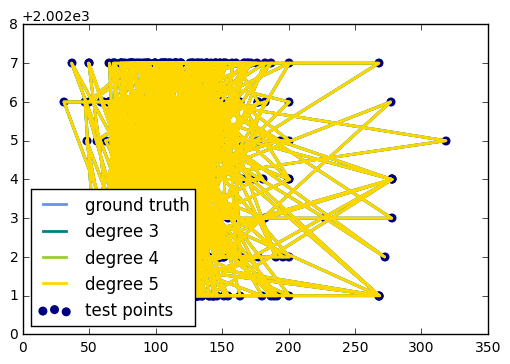

In [125]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2

plt.plot(y_test, X_test, color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(y_test, X_test, color='navy', s=30, marker='o', label="test points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_train, y_train)
    y_plot = model.predict(X_test)
    plt.plot(y_test, X_test, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()